In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualization purpose
import seaborn as sns
import warnings
warnings.filter_warnings = True
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
#reading the dataset
df = pd.read_csv('/kaggle/input/iris/Iris.csv',index_col=False)

# EDA

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop(columns = 'Id',inplace = True)
print(df.shape)
df.info()

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

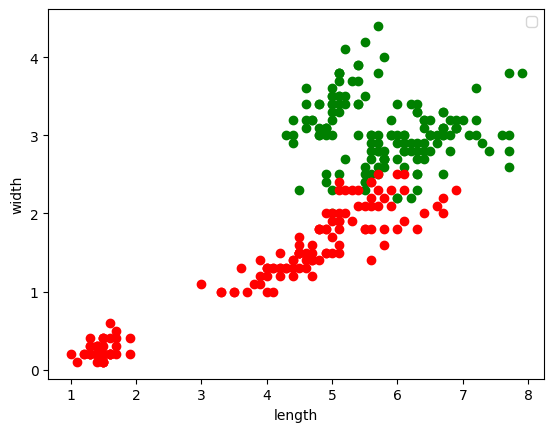

In [6]:
plt.scatter(df["SepalLengthCm"],df['SepalWidthCm'],c="g")
plt.scatter(df["PetalLengthCm"],df['PetalWidthCm'],c="r")
plt.xlabel("length")
plt.ylabel("width")
plt.legend()

 # Feature Engineering

In [7]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df.Species = encode.fit_transform(df.Species)
df.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [8]:
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
110,6.5,3.2,5.1,2.0,2
132,6.4,2.8,5.6,2.2,2
40,5.0,3.5,1.3,0.3,0
135,7.7,3.0,6.1,2.3,2
133,6.3,2.8,5.1,1.5,2


In [9]:
X = df.drop(columns = "Species")
Y = df.Species

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size = 0.9,stratify = df.Species)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

y_train.value_counts()


(135, 4) (135,)
(15, 4) (15,)


1    45
0    45
2    45
Name: Species, dtype: int64

In [11]:
scale = StandardScaler()
scale.fit_transform(X_train)
scale.transform(X_test)

array([[-0.79026501, -0.90510403,  0.08674034,  0.27403242],
       [ 2.26488322, -1.14328931,  1.80879118,  1.46739943],
       [ 1.04282393, -1.38147458,  1.17737254,  0.80441776],
       [ 0.67620614, -0.66691876,  1.06256915,  1.3348031 ],
       [-0.42364722, -1.85784512,  0.14414203,  0.14143609],
       [ 1.04282393,  0.04763705,  0.5459539 ,  0.40662876],
       [-1.03467687,  0.76219287, -1.23349864, -1.05193092],
       [-1.64570651, -1.85784512, -1.40570373, -1.18452725],
       [ 1.16502986,  0.28582233,  1.23477424,  1.46739943],
       [-0.91247094,  0.76219287, -1.29090034, -1.31712359],
       [-1.03467687, -2.57240094, -0.14286644, -0.25635291],
       [-1.1568828 ,  0.04763705, -1.29090034, -1.44971992],
       [ 0.55400021,  0.5240076 ,  1.29217593,  1.7325921 ],
       [ 0.18738242, -2.0960304 ,  0.14414203, -0.25635291],
       [-0.54585315,  0.76219287, -1.29090034, -1.05193092]])

In [12]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred = pd.Series(y_pred)

In [13]:
model.score(X_test,y_test)

1.0

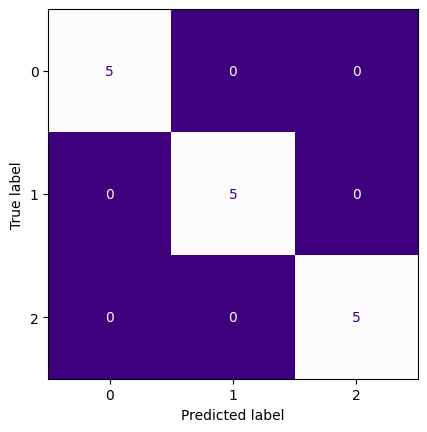

In [14]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, colorbar=False, cmap='Purples_r')
plt.grid(False)

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

